In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import cfg

import os
cfg.CONST.DEVICE = "3"
# need to set gpus before anything involving pytorch
os.environ["CUDA_VISIBLE_DEVICES"] = cfg.CONST.DEVICE

from core.train import train_net
from core.test import test_net
import torch
import pprint
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [3]:
def embed_TSNE(data):
    X_embedded = data
    X_embedded = PCA(n_components = 50, svd_solver='auto').fit_transform(X_embedded)
    X_embedded = TSNE(n_components=2).fit_transform(X_embedded) 
    return X_embedded

def visualize_tsne(embedded_latent_vectors, class_labels, title="TSNE"):
    
    embedded_df = pd.DataFrame(embedded_latent_vectors) 
    ax = embedded_df.plot.scatter(x=0, y = 1, c = class_labels, colormap="viridis")
    ax.set_title(title)

In [22]:
trial_name = "2020_03_19--18_54_21_OOWL_DA_CORAL_lam_10_TRAIN"
weights_path = "./output/CORAL/{}/checkpoints/best-ckpt.pth".format(trial_name)

trial_name = "2020_03_21--01_49_04_OWILDVoxelCls_VoxLamExp_DANNlam1_TRAIN"
weights_path = "./output/{}/checkpoints/best-ckpt.pth".format(trial_name)

weights_path = "./output/author_saved_params/Pix2Vox-A-ShapeNet.pth"

cfg.CONST.WEIGHTS = weights_path

# obtaining latent vectors for target domain
cfg.DATASET.CLASSES_TO_USE = ["aeroplane", "car", "display", "lamp", "telephone", "watercraft"]
cfg.DATASET.TEST_DATASET = "OWILD"
cfg.TEST.USE_TRAIN_SET = False
cfg.CONST.N_VIEWS_RENDERING = 8
_, t_class_labels, t_latent_vectors = test_net(cfg)
t_embedded = embed_TSNE(t_latent_vectors)

[INFO] 2020-03-21 20:10:41.684171 Collecting files of Taxonomy[ID=Airplane_Model, Name=Airplane_Model]
[INFO] 2020-03-21 20:10:41.685798 Collecting files of Taxonomy[ID=Boat_Model, Name=Boat_Model]
[INFO] 2020-03-21 20:10:41.687169 Collecting files of Taxonomy[ID=Car_Model, Name=Car_Model]
[INFO] 2020-03-21 20:10:41.688224 Collecting files of Taxonomy[ID=Lamp, Name=Lamp]
[INFO] 2020-03-21 20:10:41.689533 Collecting files of Taxonomy[ID=Monitor, Name=Monitor]
[INFO] 2020-03-21 20:10:41.690685 Collecting files of Taxonomy[ID=Telephone, Name=Telephone]
[INFO] 2020-03-21 20:10:41.691757 Complete collecting files of the dataset. Total files: 19.
[INFO] 2020-03-21 20:10:44.913051 Loading weights from ./output/author_saved_params/Pix2Vox-A-ShapeNet.pth ...


In [23]:

cfg.DATASET.CLASSES_TO_USE = ["aeroplane", "car", "display", "lamp", "telephone", "watercraft"]
cfg.DATASET.TEST_DATASET = "ShapeNet"
cfg.CONST.N_VIEWS_RENDERING=1
# obtaining latent vectors for ShapeNet source domain

_, s_class_labels, s_latent_vectors = test_net(cfg)
s_embedded = embed_TSNE(s_latent_vectors)


[INFO] 2020-03-21 20:10:52.417649 Loading cache of Taxonomy[ID=02691156, Name=aeroplane, Partition=test]
[INFO] 2020-03-21 20:10:52.428784 Loading cache of Taxonomy[ID=02958343, Name=car, Partition=test]
[INFO] 2020-03-21 20:10:52.447786 Loading cache of Taxonomy[ID=03211117, Name=display, Partition=test]
[INFO] 2020-03-21 20:10:52.450906 Loading cache of Taxonomy[ID=03636649, Name=lamp, Partition=test]
[INFO] 2020-03-21 20:10:52.455984 Loading cache of Taxonomy[ID=04401088, Name=telephone, Partition=test]
[INFO] 2020-03-21 20:10:52.458964 Loading cache of Taxonomy[ID=04530566, Name=watercraft, Partition=test]
[INFO] 2020-03-21 20:10:52.465278 Complete collecting files of the dataset. Total files: 3596.
[INFO] 2020-03-21 20:10:55.708239 Loading weights from ./output/author_saved_params/Pix2Vox-A-ShapeNet.pth ...


============================ TEST RESULTS ============================
Taxonomy	#Sample	Baseline	t=0.20	t=0.30	t=0.40	t=0.50	
aeroplane	810	0.5130		0.6665	0.6842	0.6903	0.6889	
car     	1501	0.7980		0.8476	0.8548	0.8568	0.8533	
display 	220	0.4680		0.5347	0.5373	0.5336	0.5188	
lamp    	465	0.3810		0.4481	0.4430	0.4340	0.4170	
telephone	211	0.6610		0.7696	0.7764	0.7792	0.7783	
watercraft	389	0.5130		0.5898	0.5946	0.5902	0.5779	
Overall 				0.7035	0.7110	0.7114	0.7052	



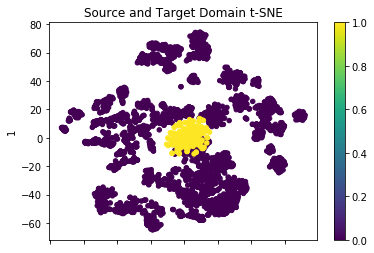

In [25]:
# show TSNE for source and target domains
s_t_embedded = np.concatenate((s_embedded, t_embedded), axis =0)
domain_labels = [0 for i in range(s_embedded.shape[0])] + [1 for i in range(t_embedded.shape[0])]
visualize_tsne(s_t_embedded, domain_labels, "Source and Target Domain t-SNE")

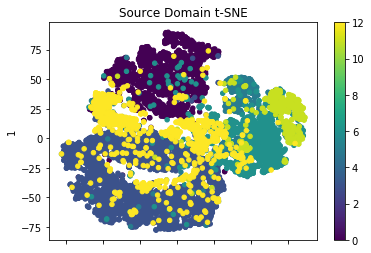

In [16]:
# show TSNE, class based for source domain
visualize_tsne(s_embedded, s_class_labels, "Source Domain t-SNE")

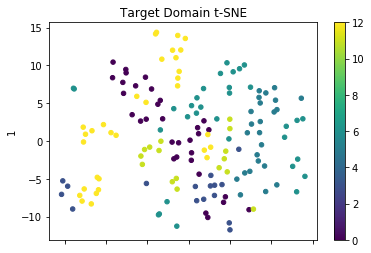

In [19]:
# show TSNE, class based for source domain
visualize_tsne(t_embedded, t_class_labels, "Target Domain t-SNE")